In [ ]:
import numpy as np
from numpy.random import poisson

from scipy.stats import poisson, norm, nbinom

import matplotlib.pyplot as plt

### Homework 3

**1.** For a constant $c$, show that $E[(s-c)^2] = (c-E[s])^2 + Var[s]$. (2 points)

**2.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

<matplotlib.legend.Legend>

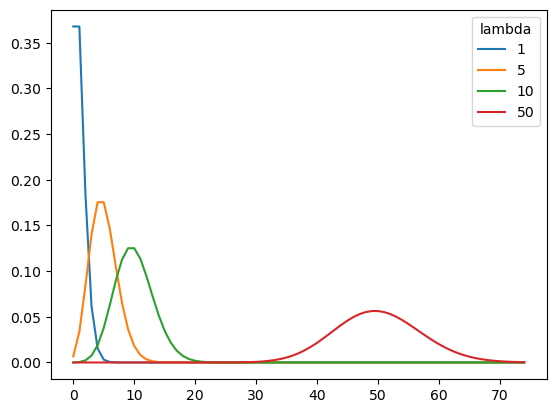

In [ ]:
K = np.arange(75)
fig, ax = plt.subplots()

ax.plot(poisson.pmf(K, mu=1), label="1")
ax.plot(poisson.pmf(K, mu=5), label="5")
ax.plot(poisson.pmf(K, mu=10), label="10")
ax.plot(poisson.pmf(K, mu=50), label="50")
ax.legend(title="lambda")

ANSWER: the single peak moves to the left and becomes more wide (i.e. the variance gets larger) while the height diminishes.

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

<matplotlib.legend.Legend>

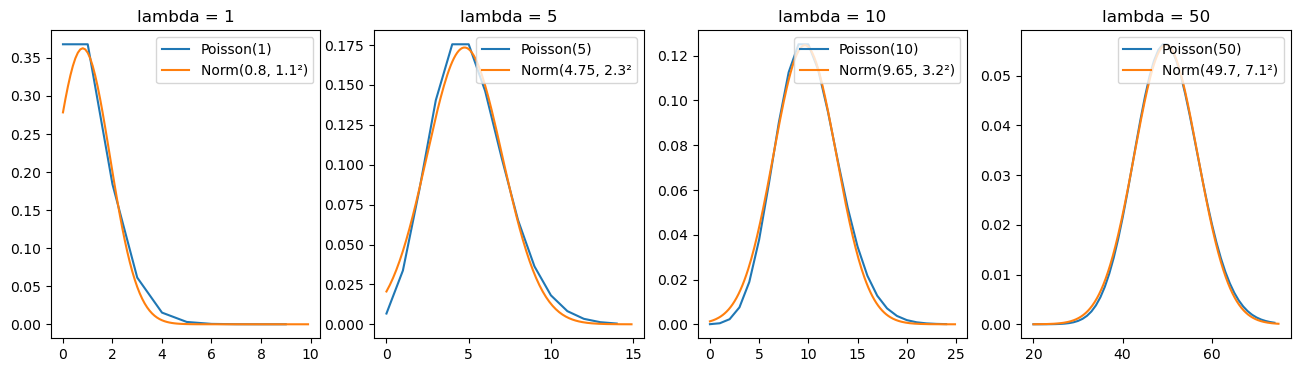

In [ ]:
X, K = np.arange(750) / 10, np.arange(75)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))

n = 10
k, x = K[:n], X[: n * 10]
ax1.set_title("lambda = 1")
ax1.plot(k, poisson.pmf(k, mu=1), label="Poisson(1)")
ax1.plot(x, norm.pdf(x, loc=0.8, scale=1.1), label="Norm(0.8, 1.1²)")
ax1.legend(loc="upper right")

n = 15
k, x = K[:n], X[: n * 10]
ax2.set_title("lambda = 5")
ax2.plot(k, poisson.pmf(k, mu=5), label="Poisson(5)")
ax2.plot(x, norm.pdf(x, loc=4.75, scale=2.3), label="Norm(4.75, 2.3²")
ax2.legend(loc="upper right")

n = 25
k, x = K[:n], X[: n * 10]
ax3.set_title("lambda = 10")
ax3.plot(k, poisson.pmf(k, mu=10), label="Poisson(10)")
ax3.plot(x, norm.pdf(x, loc=9.65, scale=3.2), label="Norm(9.65, 3.2²)")
ax3.legend(loc="upper right")

m, n = 20, 100
k, x = K[m:n], X[m * 10 : n * 10]
ax4.set_title("lambda = 50")
ax4.plot(k, poisson.pmf(k, mu=50), label="Poisson(50)")
ax4.plot(x, norm.pdf(x, loc=49.7, scale=7.1), label="Norm(49.7, 7.1²)")
ax4.legend(loc="upper right")

**3. Noise models**

Assume a tuning curve $f(s)$ with stimulus angle $s \in [-\pi, \pi]$:
$$f(s) = \begin{cases}
    - f_{max} \tfrac4{\pi^2} (s-\tfrac\pi2) (s + \tfrac\pi2) &\quad s \in [-\tfrac\pi2, \tfrac\pi2]\\
    0 &\quad else
\end{cases} $$
In each subtask the firing rate $r$ is given by a different noise model. For a discreticed interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

In [ ]:
s_interval = np.linspace(-np.pi, np.pi, 51, endpoint=True)


In [ ]:
def f(s, fmax):
    return np.where(
        np.abs(s) <= np.pi / 2,
        -fmax * 4 / np.pi**2 * (s - np.pi / 2) * (s + np.pi / 2),
        0,
    )


fs1, fs10, fs100 = f(s_interval, 1), f(s_interval, 10), f(s_interval, 100)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

In [ ]:
def draw(fs):
    draws = []
    for f in fs:
        draws.append(norm.rvs(loc=f, scale=1, size=10)[:, np.newaxis])
    return np.concatenate(draws, axis=1).T

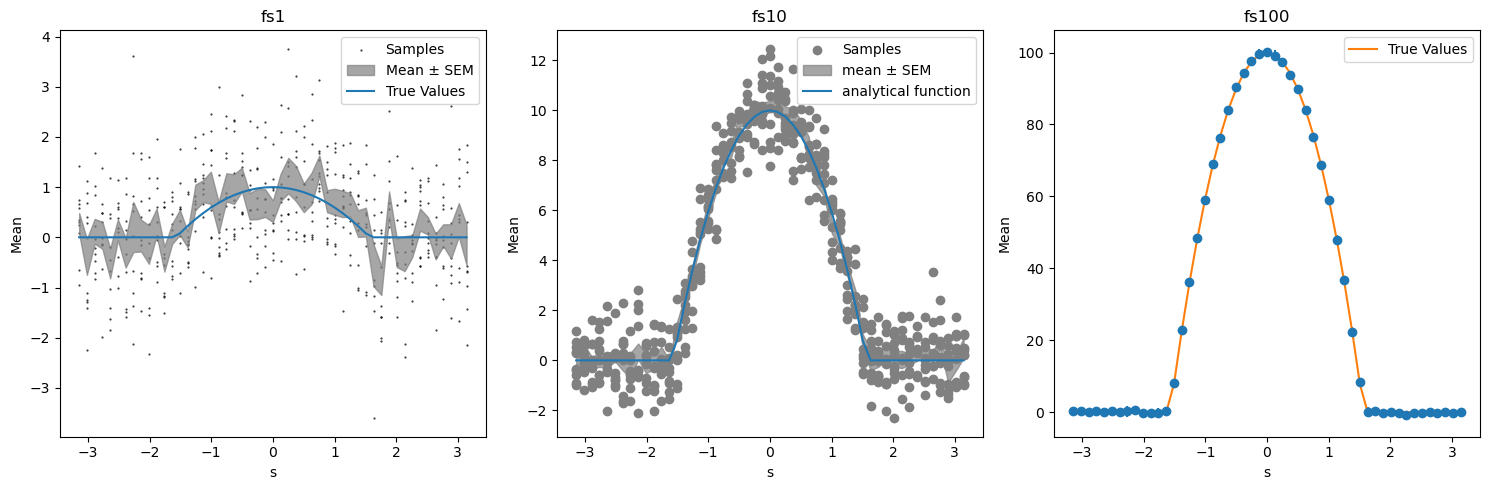

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

data = draw(fs1)
mean = data.mean(axis=1)
std = data.std(axis=1)
sem = std / np.sqrt(data.shape[1])
for i, s in enumerate(s_interval):
    ax1.scatter(
        [s] * 10,
        data[i, :],
        alpha=0.8,
        color="black",
        s=0.3,
        label="Samples" if i == 0 else None,
    )
ax1.fill_between(
    s_interval, mean - sem, mean + sem, color="gray", alpha=0.7, label="mean ± SEM"
)
ax1.plot(s_interval, fs1, label="True Values")
ax1.set_xlabel("s")
ax1.set_ylabel("Mean")
ax1.set_title("fs1")
ax1.legend()

data = draw(fs10)
mean = draw(fs10).mean(axis=1)
std = draw(fs10).std(axis=1)
for i, s in enumerate(s_interval):
    ax1.scatter(
        [s] * 10,
        data[i, :],
        alpha=0.8,
        color="black",
        s=0.3,
        label="Samples" if i == 0 else None,
    )

ax2.fill_between(
    s_interval, mean - sem, mean + sem, color="gray", alpha=0.7, label="mean ± SEM"
)
ax2.plot(s_interval, fs10, label="analytical function")
ax2.set_xlabel("s")
ax2.set_ylabel("Mean")
ax2.set_title("fs10")
ax2.legend()


mean = draw(fs100).mean(axis=1)
std = draw(fs100).std(axis=1)
ax3.errorbar(s_interval, mean, yerr=std, fmt="o")
ax3.plot(s_interval, fs100, label="True Values")
ax3.set_xlabel("s")
ax3.set_ylabel("Mean")
ax3.set_title("fs100")
ax3.legend()

plt.tight_layout()
plt.show()

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

In [ ]:
def draw(fs):
    draws = []
    for f in fs:
        draws.append(norm.rvs(loc=f, scale=f, size=10)[:, np.newaxis])
    return np.concatenate(draws, axis=1).T

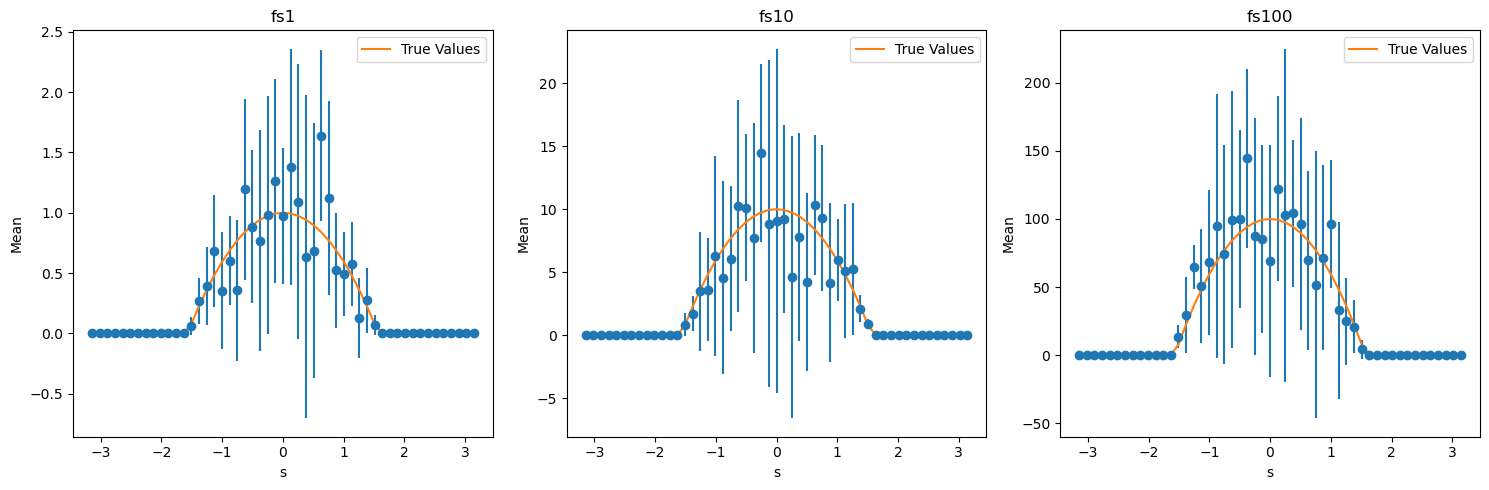

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
mean = draw(fs1).mean(axis=1)
std = draw(fs1).std(axis=1)
ax1.errorbar(s_interval, mean, yerr=std, fmt='o')
ax1.plot(s_interval, fs1, label='True Values')
ax1.set_xlabel('s')
ax1.set_ylabel('Mean')
ax1.set_title('fs1')
ax1.legend()

mean = draw(fs10).mean(axis=1)
std = draw(fs10).std(axis=1)
ax2.errorbar(s_interval, mean, yerr=std, fmt='o')
ax2.plot(s_interval, fs10, label='True Values')
ax2.set_xlabel('s')
ax2.set_ylabel('Mean')
ax2.set_title('fs10')
ax2.legend()


mean = draw(fs100).mean(axis=1)
std = draw(fs100).std(axis=1)
ax3.errorbar(s_interval, mean, yerr=std, fmt='o')
ax3.plot(s_interval, fs100, label='True Values')
ax3.set_xlabel('s')
ax3.set_ylabel('Mean')
ax3.set_title('fs100')
ax3.legend()

plt.tight_layout()
plt.show()

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

In [ ]:
def draw(fs):
    draws = []
    for f in fs:
        draws.append(poisson.rvs(mu=f, size=10)[:, np.newaxis])
    return np.concatenate(draws, axis=1).T

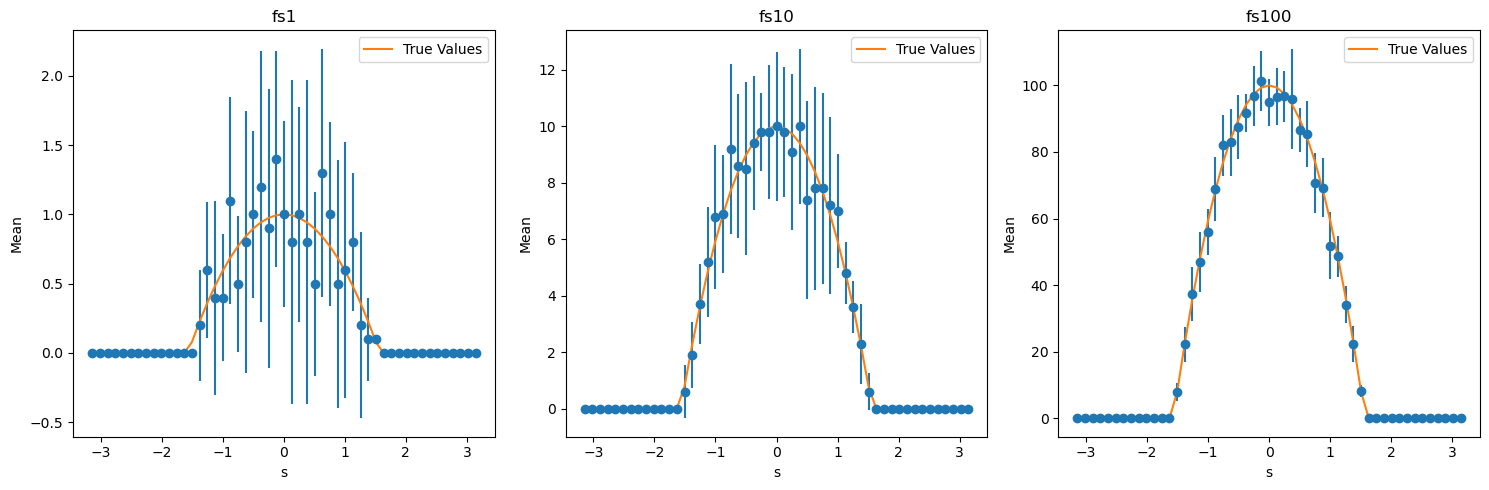

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
mean = draw(fs1).mean(axis=1)
std = draw(fs1).std(axis=1)
ax1.errorbar(s_interval, mean, yerr=std, fmt='o')
ax1.plot(s_interval, fs1, label='True Values')
ax1.set_xlabel('s')
ax1.set_ylabel('Mean')
ax1.set_title('fs1')
ax1.legend()

mean = draw(fs10).mean(axis=1)
std = draw(fs10).std(axis=1)
ax2.errorbar(s_interval, mean, yerr=std, fmt='o')
ax2.plot(s_interval, fs10, label='True Values')
ax2.set_xlabel('s')
ax2.set_ylabel('Mean')
ax2.set_title('fs10')
ax2.legend()


mean = draw(fs100).mean(axis=1)
std = draw(fs100).std(axis=1)
ax3.errorbar(s_interval, mean, yerr=std, fmt='o')
ax3.plot(s_interval, fs100, label='True Values')
ax3.set_xlabel('s')
ax3.set_ylabel('Mean')
ax3.set_title('fs100')
ax3.legend()

plt.tight_layout()
plt.show()

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

In [ ]:
def draw(fs):
    draws = []
    for f in fs:
        if f == 0:  # Handle the case where p=0
            draws.append(np.zeros((10, 1)))
            continue
        q = f
        p = f / (f + q)
        draws.append(nbinom.rvs(n=q, p=p, size=10)[:, np.newaxis])
    return np.concatenate(draws, axis=1).T

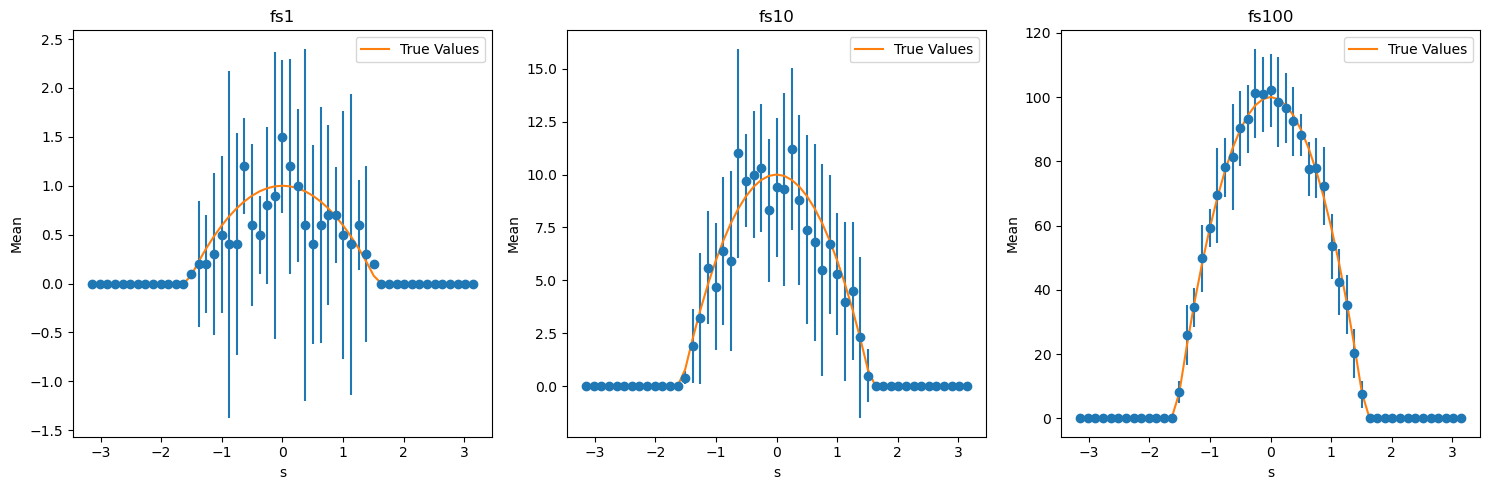

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

mean = draw(fs1).mean(axis=1)
std = draw(fs1).std(axis=1)
ax1.errorbar(s_interval, mean, yerr=std, fmt='o')
ax1.plot(s_interval, fs1, label='True Values')
ax1.set_xlabel('s')
ax1.set_ylabel('Mean')
ax1.set_title('fs1')
ax1.legend()

mean = draw(fs10).mean(axis=1)
std = draw(fs10).std(axis=1)
ax2.errorbar(s_interval, mean, yerr=std, fmt='o')
ax2.plot(s_interval, fs10, label='True Values')
ax2.set_xlabel('s')
ax2.set_ylabel('Mean')
ax2.set_title('fs10')
ax2.legend()


mean = draw(fs100).mean(axis=1)
std = draw(fs100).std(axis=1)
ax3.errorbar(s_interval, mean, yerr=std, fmt='o')
ax3.plot(s_interval, fs100, label='True Values')
ax3.set_xlabel('s')
ax3.set_ylabel('Mean')
ax3.set_title('fs100')
ax3.legend()

plt.tight_layout()
plt.show()

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

In [ ]:
f_max_list = [1, 10, 100]
s_interval = np.linspace(-np.pi, np.pi, 51, endpoint=True)
n_samples = 10


def tuning_function(s, f_max):
    return